$\textbf{PROGRAMMING ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).

In [8]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2

cpsp = fetch_ucirepo(id=878) 
  
X = cpsp.data.features 
Y = cpsp.data.targets 

data = pd.concat([X, Y], axis=1)
print(cpsp.metadata)

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'title': 'Prognos

In [9]:
print(cpsp.variables)

             name     role         type demographic  \
0              ID       ID      Integer        None   
1          N_Days    Other      Integer        None   
2          Status   Target  Categorical        None   
3            Drug  Feature  Categorical        None   
4             Age  Feature      Integer         Age   
5             Sex  Feature  Categorical         Sex   
6         Ascites  Feature  Categorical        None   
7    Hepatomegaly  Feature  Categorical        None   
8         Spiders  Feature  Categorical        None   
9           Edema  Feature  Categorical        None   
10      Bilirubin  Feature   Continuous        None   
11    Cholesterol  Feature      Integer        None   
12        Albumin  Feature   Continuous        None   
13         Copper  Feature      Integer        None   
14       Alk_Phos  Feature   Continuous        None   
15           SGOT  Feature   Continuous        None   
16  Tryglicerides  Feature      Integer        None   
17      Pl

In [10]:
X.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0


In [11]:
data.fillna('Missing', inplace=True)

categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}
for column in categorical_columns:
    data[column] = data[column].astype(str)
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

correlation_matrix = data.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df_corr_viz = correlation_matrix.mask(mask).dropna(how='all').dropna(axis=1, how='all')

fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height=900, width=900)
fig.show()

C:\Users\seals\AppData\Local\Temp\ipykernel_11204\2135081390.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.




SKIPPED COLUMN: Drug due to non-numeric data or empty after conversion.


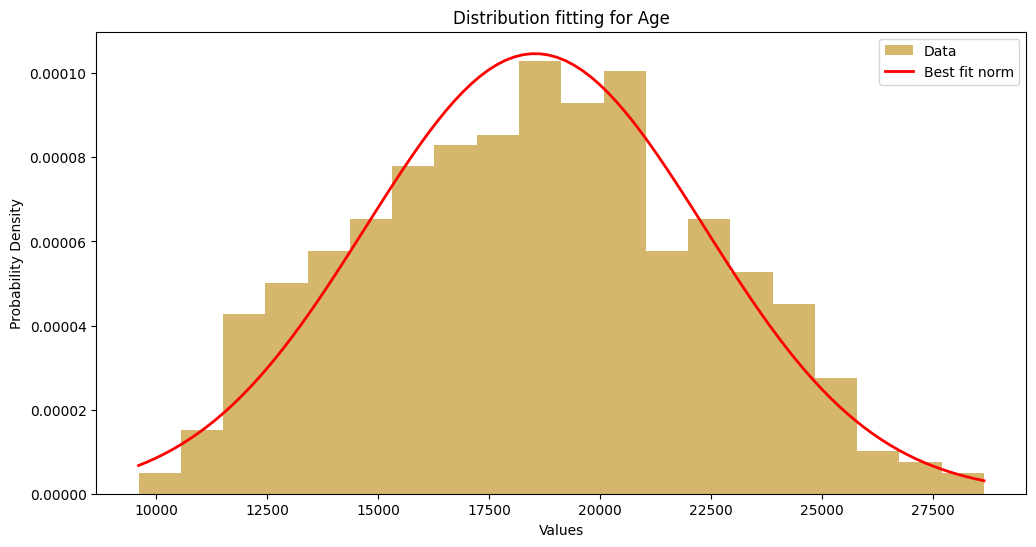

Best fitting distribution for Age: norm
Parameters: (18533.351674641148, 3811.277913412081)

SKIPPED COLUMN: Sex due to non-numeric data or empty after conversion.

SKIPPED COLUMN: Ascites due to non-numeric data or empty after conversion.

SKIPPED COLUMN: Hepatomegaly due to non-numeric data or empty after conversion.

SKIPPED COLUMN: Spiders due to non-numeric data or empty after conversion.

SKIPPED COLUMN: Edema due to non-numeric data or empty after conversion.


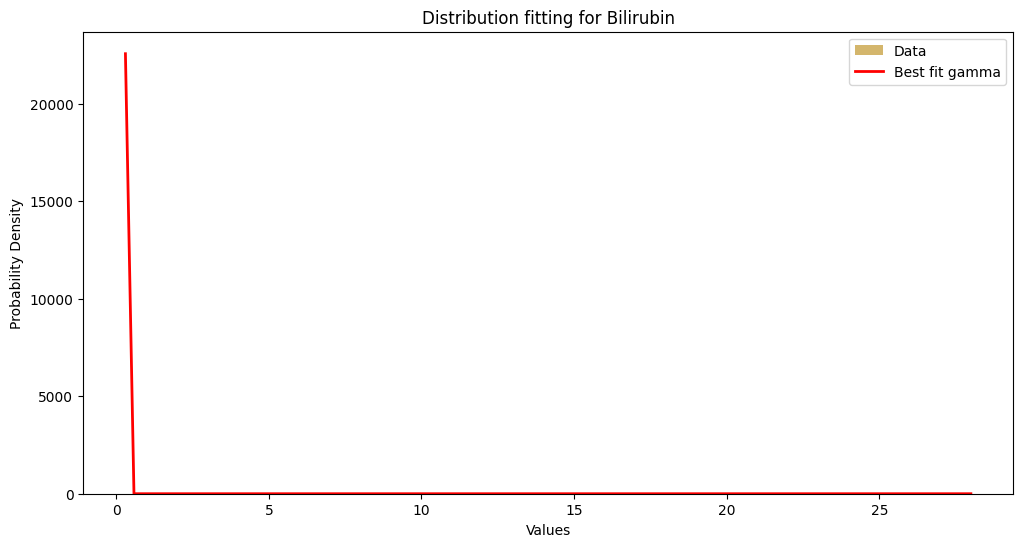

Best fitting distribution for Bilirubin: gamma
Parameters: (0.6997584873764632, 0.29999999999999993, 3.900868770782954)


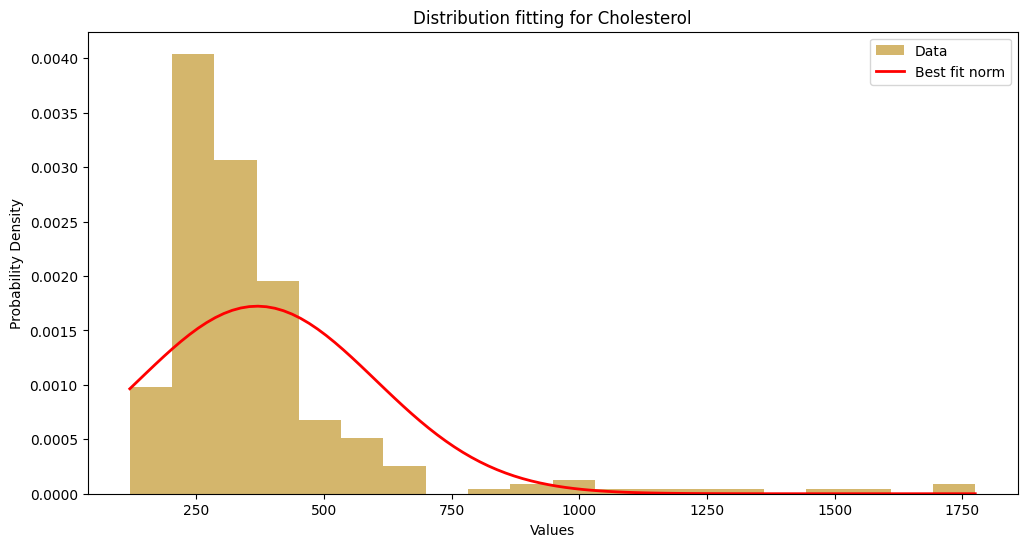

Best fitting distribution for Cholesterol: norm
Parameters: (369.51056338028167, 231.5358318656332)


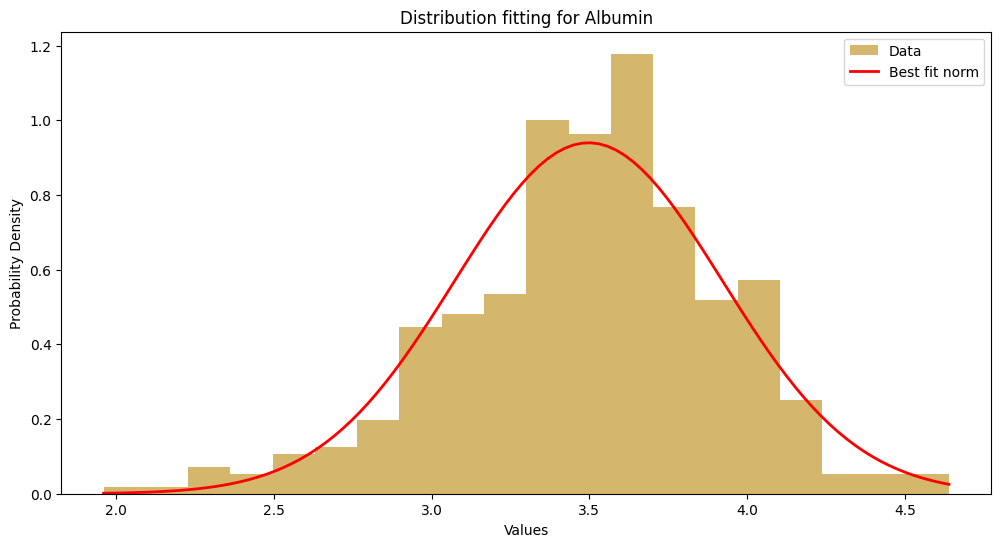

Best fitting distribution for Albumin: norm
Parameters: (3.4974401913875592, 0.42446296214339163)


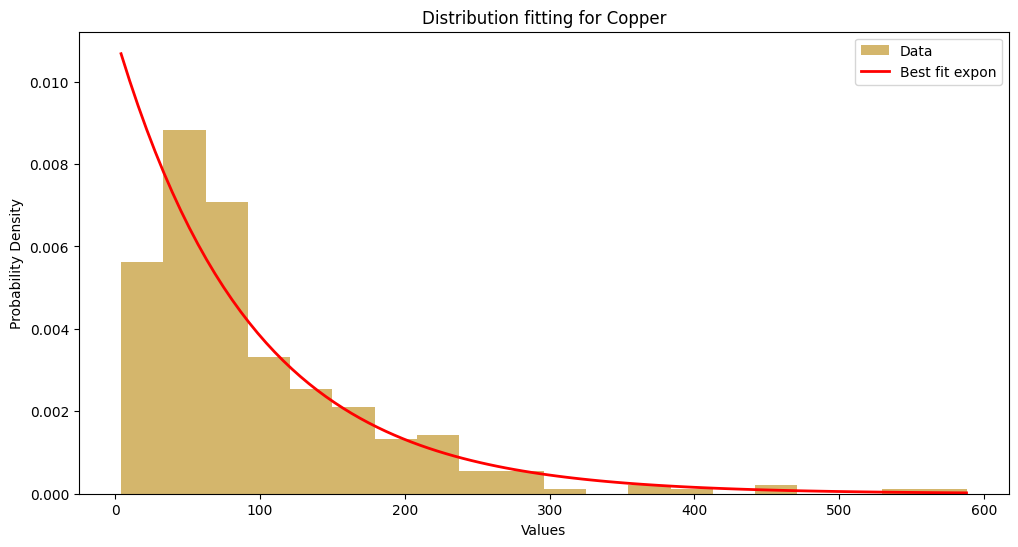

Best fitting distribution for Copper: expon
Parameters: (4.0, 93.64838709677419)


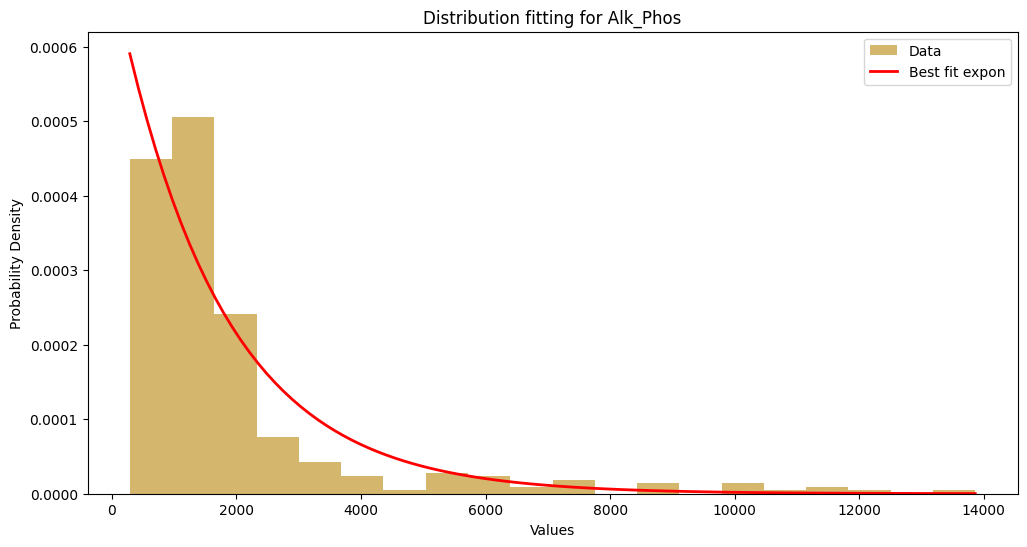

Best fitting distribution for Alk_Phos: expon
Parameters: (289.0, 1693.6557692307692)


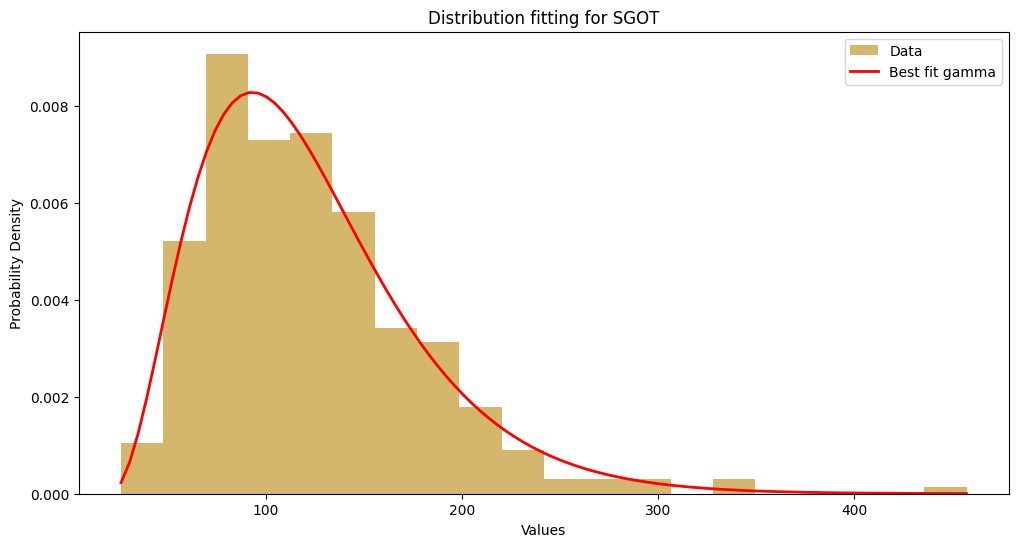

Best fitting distribution for SGOT: gamma
Parameters: (3.5343735118992328, 19.015877623435102, 29.29528981797585)


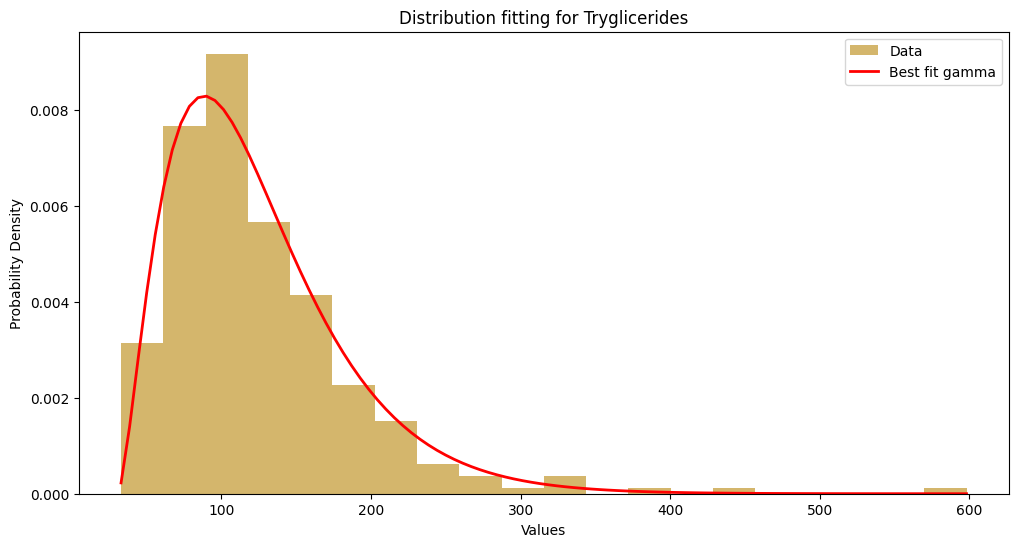

Best fitting distribution for Tryglicerides: gamma
Parameters: (2.6022219495954246, 30.66048657753064, 36.13899118469018)


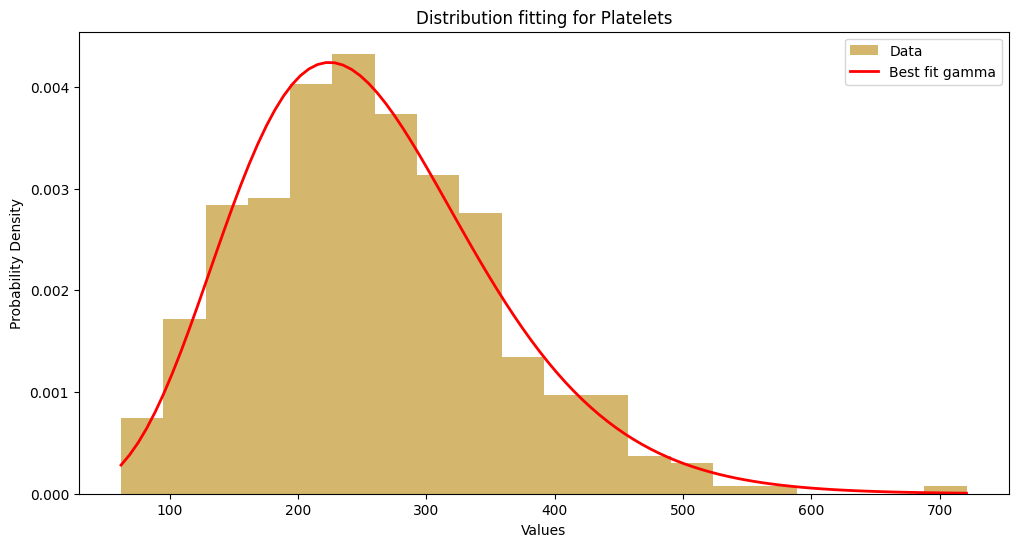

Best fitting distribution for Platelets: gamma
Parameters: (9.166256603167, -41.71755135768572, 32.59150759259008)


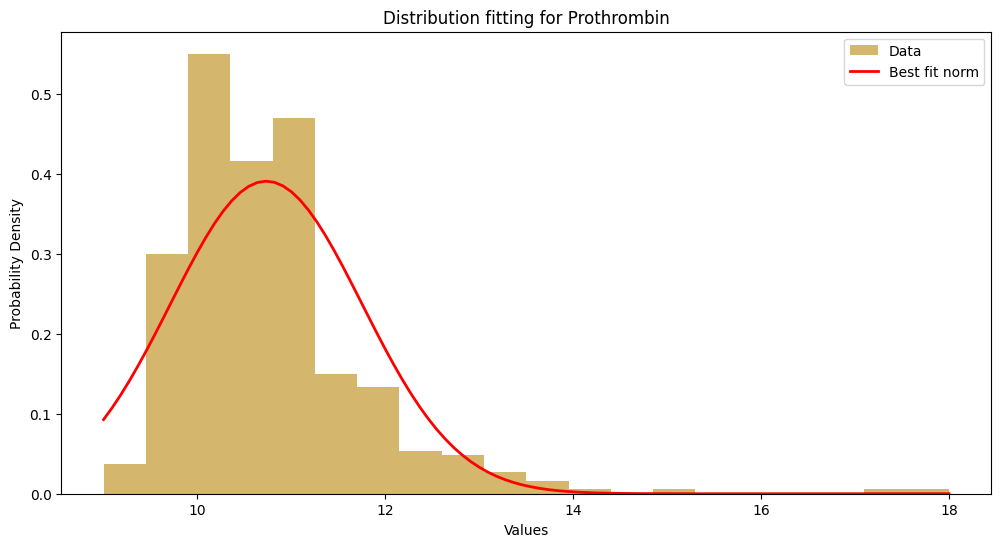

Best fitting distribution for Prothrombin: norm
Parameters: (10.731730769230769, 1.0207712415202501)


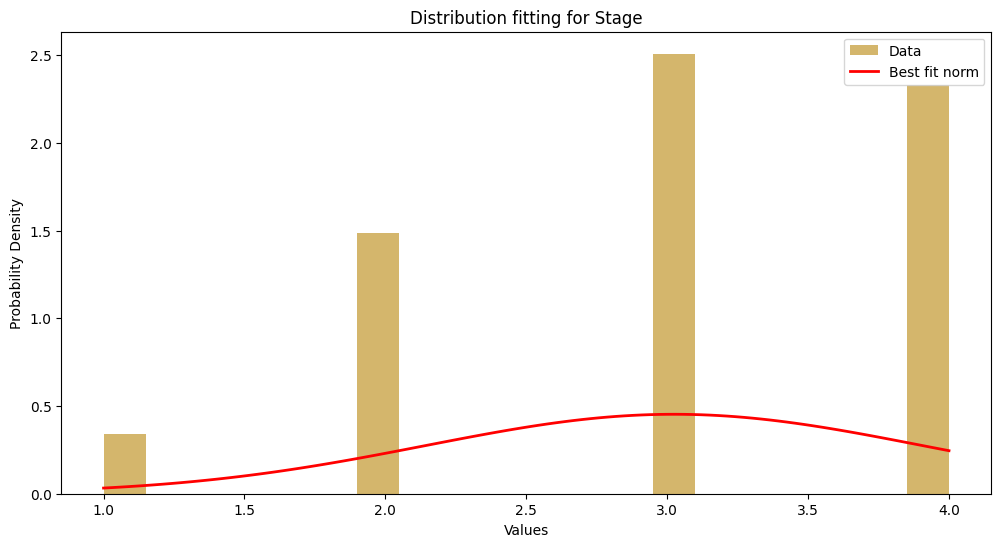

Best fitting distribution for Stage: norm
Parameters: (3.0242718446601944, 0.8809710021805512)

Total distribution counts:
norm: 5
expon: 2
gamma: 4


In [12]:
distributions = ['norm', 'expon', 'gamma']
distribution_counts = {dist_name: 0 for dist_name in distributions}

for column in X.columns:
    data = pd.to_numeric(X[column], errors='coerce')
    data = data.dropna()

    if data.empty:
        print(f'\COLUMN {column} skipped due to non-numeric data or empty after conversion.')
        continue

    if np.isfinite(data).all():
        best_fit_name = ''
        best_fit_params = {}
        best_kstest_stat = np.inf

        for dist_name in distributions:
            dist = getattr(stats, dist_name)
            params = dist.fit(data)
            kstest_stat, _ = stats.kstest(data, dist_name, args=params)

            if kstest_stat < best_kstest_stat:
                best_fit_name = dist_name
                best_fit_params = params
                best_kstest_stat = kstest_stat

        distribution_counts[best_fit_name] += 1

        plt.figure(figsize=(12, 6))
        plt.hist(data, bins=20, density=True, alpha=0.6, color='darkgoldenrod', label='Data')

        dist = getattr(stats, best_fit_name)
        x = np.linspace(min(data), max(data), 100)
        pdf = dist.pdf(x, *best_fit_params)
        plt.plot(x, pdf, 'r-', lw=2, label=f'Best fit {best_fit_name}')

        plt.title(f'Distribution fitting for {column}')
        plt.xlabel('Values')
        plt.ylabel('Probability Density')
        plt.legend()
        plt.show()

        print(f'Best fitting distribution for {column}: {best_fit_name}')
        print('Parameters:', best_fit_params)
    else:
        print(f'\nCOLUMN {column} skipped due to non-finite values')

print('\nTotal distribution counts:')
for dist_name, count in distribution_counts.items():
    print(f'{dist_name}: {count}')

In [13]:
summary_statistics = X.describe()
print(summary_statistics)

                Age   Bilirubin     Albumin      Alk_Phos        SGOT  \
count    418.000000  418.000000  418.000000    312.000000  312.000000   
mean   18533.351675    3.220813    3.497440   1982.655769  122.556346   
std     3815.845055    4.407506    0.424972   2140.388824   56.699525   
min     9598.000000    0.300000    1.960000    289.000000   26.350000   
25%    15644.500000    0.800000    3.242500    871.500000   80.600000   
50%    18628.000000    1.400000    3.530000   1259.000000  114.700000   
75%    21272.500000    3.400000    3.770000   1980.000000  151.900000   
max    28650.000000   28.000000    4.640000  13862.400000  457.250000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000  


# Hypothesis Test
## The Correlation Between Platelets and Cholesterol
- Null Hypothesis (H0): There is no correlation between platelets and cholesterol.
- Alternative Hypothesis (H1): There is a correlation between platelets and cholesterol.

In [14]:
data = X.dropna(subset=['Platelets', 'Cholesterol'])
contingency_table = pd.crosstab(data['Platelets'], data['Cholesterol'])

row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)
total = contingency_table.values.sum()

expected_counts = pd.DataFrame(
    [[(row_total * column_total) / total for column_total in column_totals]
     for row_total in row_totals],
    index=contingency_table.index,
    columns=contingency_table.columns
)

chi_squared_stat = ((contingency_table - expected_counts) ** 2 / expected_counts).values.sum()

num_rows = contingency_table.shape[0] - 1 
num_columns = contingency_table.shape[1] - 1 
degrees_of_freedom = num_rows * num_columns
p_value = chi2.sf(chi_squared_stat, degrees_of_freedom)

print("Chi-squared Statistic: ", chi_squared_stat)
print("Degrees of Freedom: ", degrees_of_freedom)
print("P-Value: ", p_value, "\n")

if p_value < 0.05:
    print("There is a significant correlation between platelets and cholesterol, indicating that these two features are not independent.")
else:
    print("There exists no significant correlation between platelets and cholesterol.")

Chi-squared Statistic:  42753.40952380954
Degrees of Freedom:  42210
P-Value:  0.031118957598199173 

There is a significant correlation between platelets and cholesterol, indicating that these two features are not independent.
